## Import Library

In [ ]:
!pip install -q torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 75.0 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers==4.41.2 accelerate datasets==2.18.0 evaluate seqeval jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 15.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages th

1. Load Dataset

In [ ]:
from datasets import load_dataset

# Load the MINDS-14 dataset with trust_remote_code set to True
dataset = load_dataset("PolyAI/minds14", "en-US", trust_remote_code=True)

# Now you can proceed with your data processing as usual
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 563
    })
})


In [ ]:
def preprocess_data(batch):
    # Load audio file and resample to 16kHz
    speech_array, sampling_rate = torchaudio.load(batch["audio"]["path"])
    resampler = torchaudio.transforms.Resample(orig_freq=sampling_rate, new_freq=16000)
    speech = resampler(speech_array).squeeze().numpy()

    # Process audio
    batch["input_features"] = processor(speech, sampling_rate=16000, return_tensors="pt").input_features

    # Process text
    batch["labels"] = processor.tokenizer(batch["transcription"], padding="max_length", truncation=True, max_length=128).input_ids
    return batch

In [ ]:
# Split the dataset into train and validation sets
dataset = dataset["train"].train_test_split(test_size=0.1)
dataset

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 506
    })
    test: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 57
    })
})

In [ ]:
dataset['train'][0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~APP_ERROR/602ba642963e11ccd901cccc.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~APP_ERROR/602ba642963e11ccd901cccc.wav',
  'array': array([-0.00024414,  0.        , -0.00024414, ...,  0.00244141,
          0.00219727,  0.0045166 ]),
  'sampling_rate': 8000},
 'transcription': "hi I'm having issue with your app coming up on my phone and being able to walk again",
 'english_transcription': "hi I'm having issue with your app coming up on my phone and being able to walk again",
 'intent_class': 2,
 'lang_id': 4}

- dataframe

In [ ]:
# Konversi split 'train' ke dalam DataFrame
train_data = dataset['train'].to_pandas()

# Konversi split 'test' ke dalam DataFrame
test_data = dataset['test'].to_pandas()

In [ ]:
train_data.head()

path  \
0  /root/.cache/huggingface/datasets/downloads/ex...   
1  /root/.cache/huggingface/datasets/downloads/ex...   
2  /root/.cache/huggingface/datasets/downloads/ex...   
3  /root/.cache/huggingface/datasets/downloads/ex...   
4  /root/.cache/huggingface/datasets/downloads/ex...   

                                               audio  \
0  {'bytes': None, 'path': '/root/.cache/huggingf...   
1  {'bytes': None, 'path': '/root/.cache/huggingf...   
2  {'bytes': None, 'path': '/root/.cache/huggingf...   
3  {'bytes': None, 'path': '/root/.cache/huggingf...   
4  {'bytes': None, 'path': '/root/.cache/huggingf...   

                                       transcription  \
0  hi I'm having issue with your app coming up on...   
1  hi I was just using the banking app that you g...   
2  I want to make a large payment and I need a co...   
3  hello I'm going to see if I would want to give...   
4  where can I want to where can I go if I want t...   

                               english_transcription  intent_class  lang_id  
0  hi I'm having issue with your app coming up on...             2        4  
1  hi I was just using the banking app that you g...             2        4  
2  I want to make a large payment and I need a co...            10        4  
3  hello I'm going to see if I would want to give...             8        4  
4  where can I want to where can I go if I want t...             7        4

In [ ]:
test_data.head()

path  \
0  /root/.cache/huggingface/datasets/downloads/ex...   
1  /root/.cache/huggingface/datasets/downloads/ex...   
2  /root/.cache/huggingface/datasets/downloads/ex...   
3  /root/.cache/huggingface/datasets/downloads/ex...   
4  /root/.cache/huggingface/datasets/downloads/ex...   

                                               audio  \
0  {'bytes': None, 'path': '/root/.cache/huggingf...   
1  {'bytes': None, 'path': '/root/.cache/huggingf...   
2  {'bytes': None, 'path': '/root/.cache/huggingf...   
3  {'bytes': None, 'path': '/root/.cache/huggingf...   
4  {'bytes': None, 'path': '/root/.cache/huggingf...   

                                       transcription  \
0                    what is my ATM withdrawal limit   
1  hello I'd like to set up a joint account was m...   
2  hi I would like to know whether or not my cred...   
3     yes hello I'd like to change my address please   
4                  I need to put a freeze on my card   

                               english_transcription  intent_class  lang_id  
0                    what is my ATM withdrawal limit             3        4  
1  hello I'd like to set up a joint account was m...            11        4  
2  hi I would like to know whether or not my cred...             0        4  
3     yes hello I'd like to change my address please             1        4  
4                  I need to put a freeze on my card             9        4

In [ ]:
train_data.shape

(506, 6)

In [ ]:
test_data.shape

(57, 6)

In [ ]:
train_data.columns

Index(['path', 'audio', 'transcription', 'english_transcription',
       'intent_class', 'lang_id'],
      dtype='object')

- path (str): Path to the audio file
- audio (dict): Audio object including loaded audio array, sampling rate and path ot audio
- transcription (str): Transcription of the audio file
- english_transcription (str): English transcription of the audio file
- intent_class (int): Class id of intent
- lang_id (int): Id of language

- Distribusi data tiap kelas

In [ ]:
import matplotlib.pyplot as plt

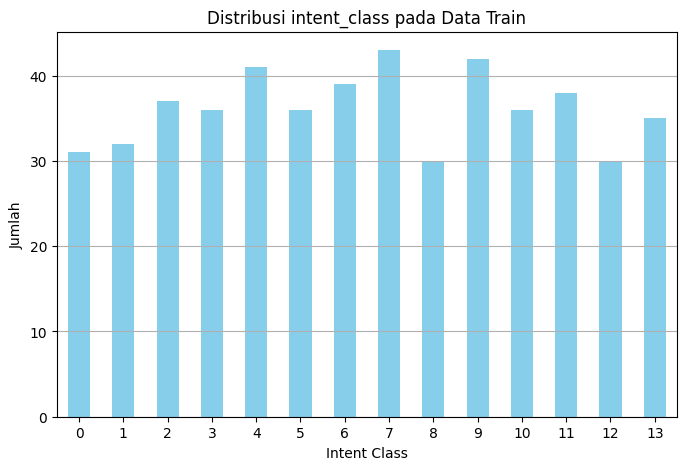

In [ ]:
# Menghitung jumlah tiap intent_class dalam data train
intent_counts_train = train_data['intent_class'].value_counts().sort_index()

# Visualisasi bar chart
plt.figure(figsize=(8, 5))
intent_counts_train.plot(kind='bar', color='skyblue')
plt.title('Distribusi intent_class pada Data Train')
plt.xlabel('Intent Class')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

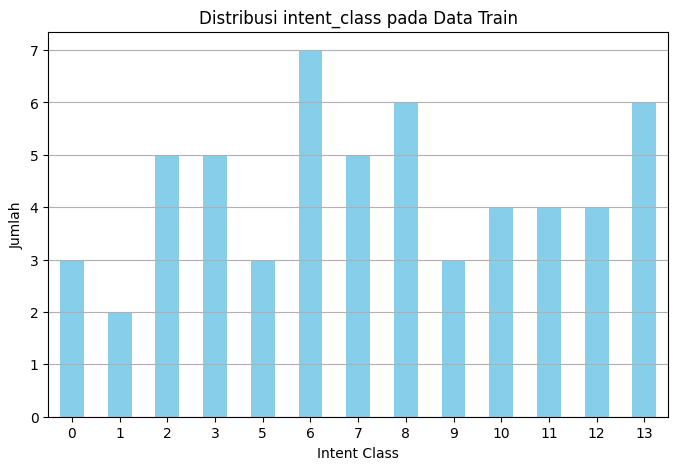

In [ ]:
# Menghitung jumlah tiap intent_class dalam data train
intent_counts_test = test_data['intent_class'].value_counts().sort_index()

# Visualisasi bar chart
plt.figure(figsize=(8, 5))
intent_counts_test.plot(kind='bar', color='skyblue')
plt.title('Distribusi intent_class pada Data Train')
plt.xlabel('Intent Class')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- Display waveplot, spectogram

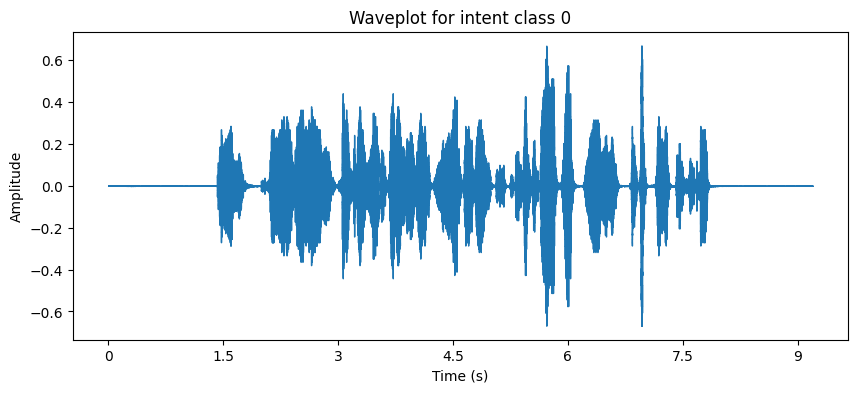

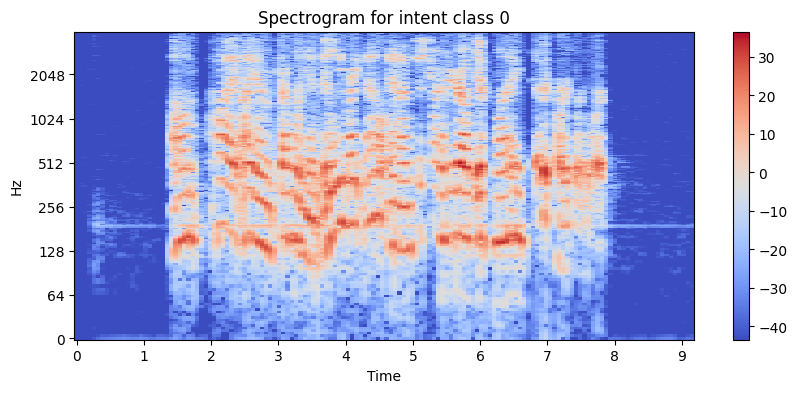

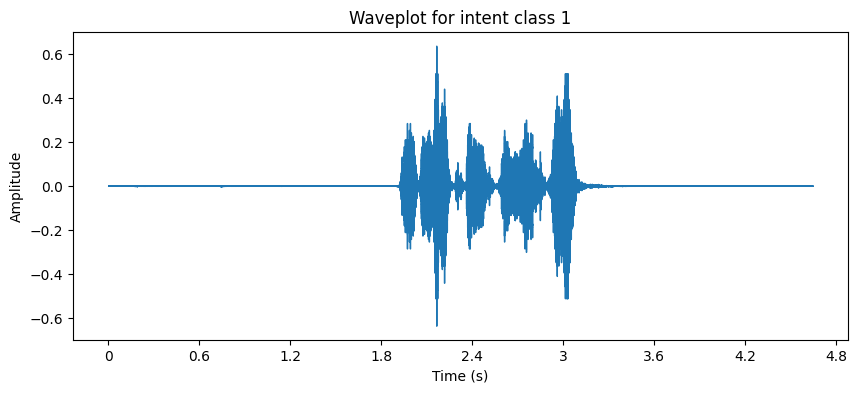

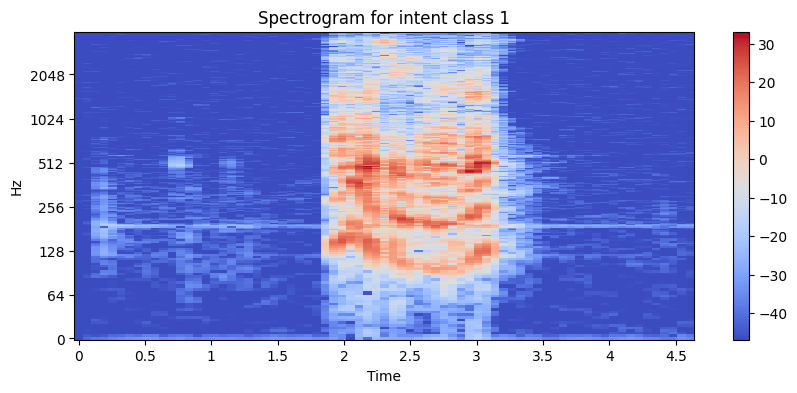

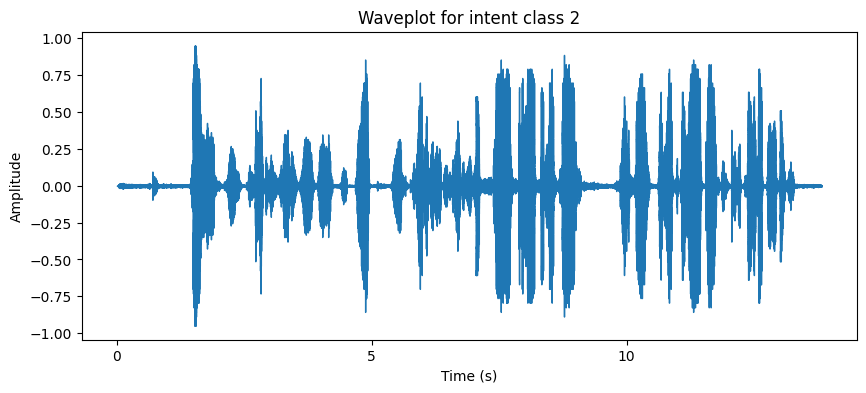

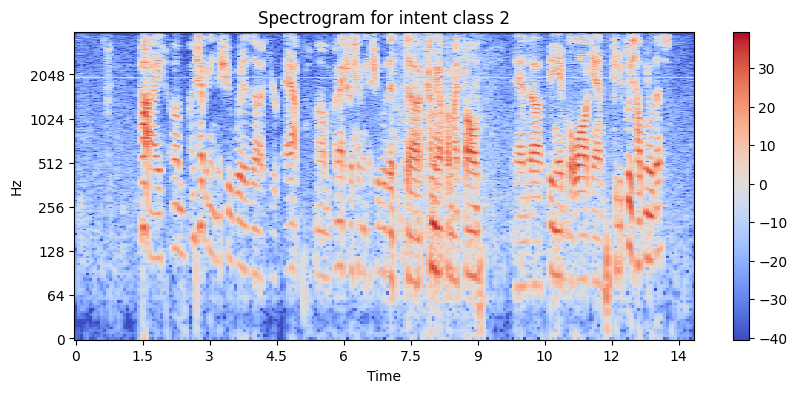

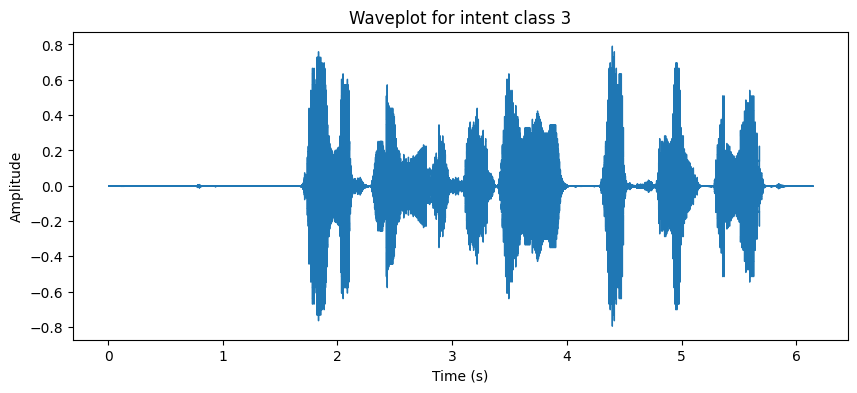

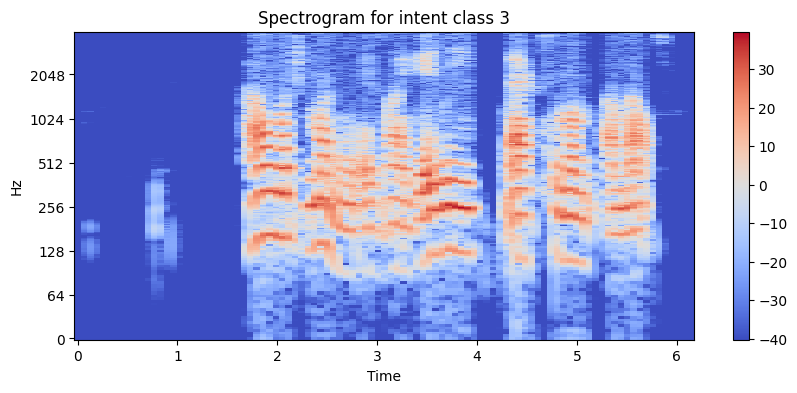

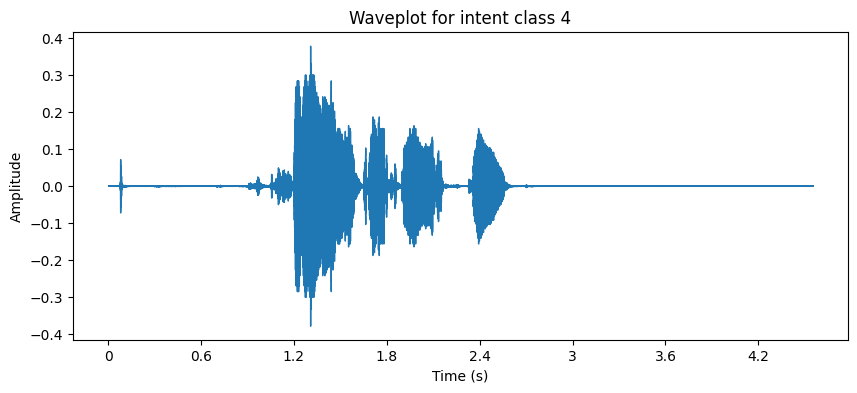

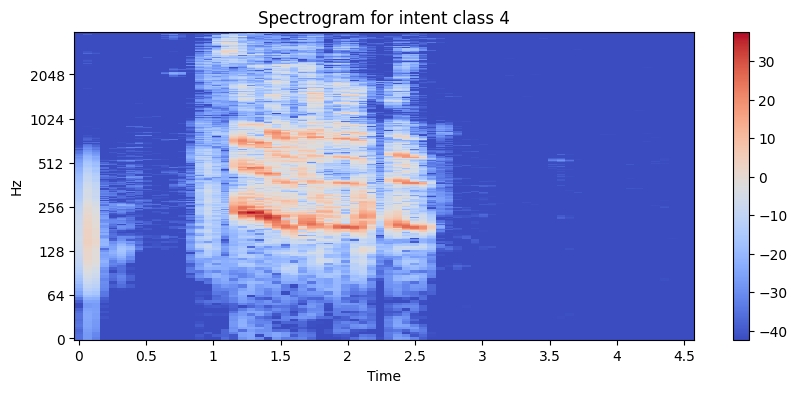

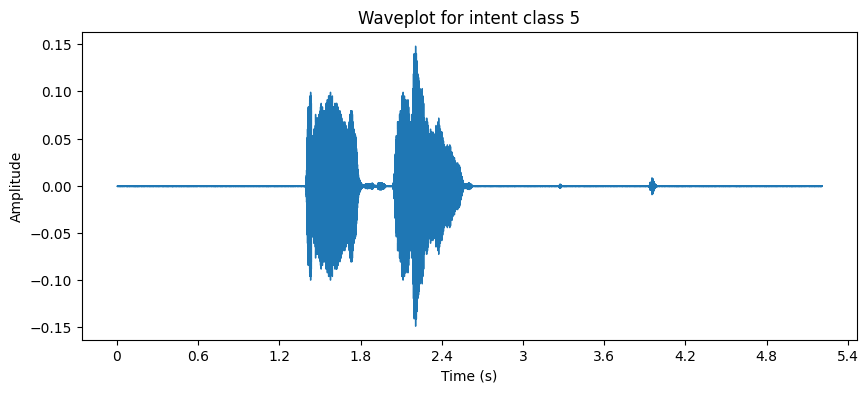

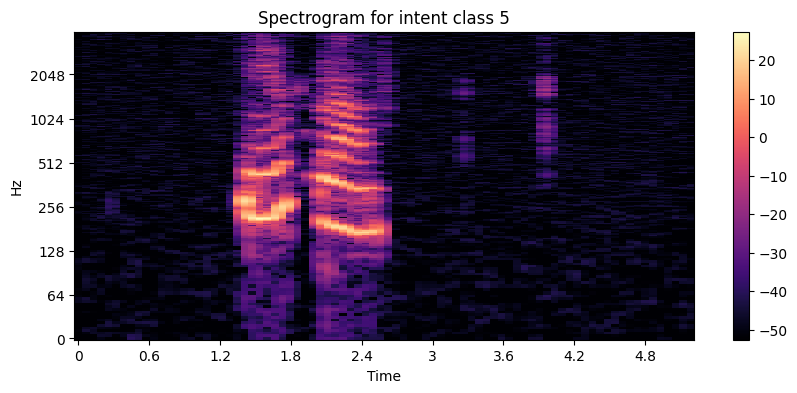

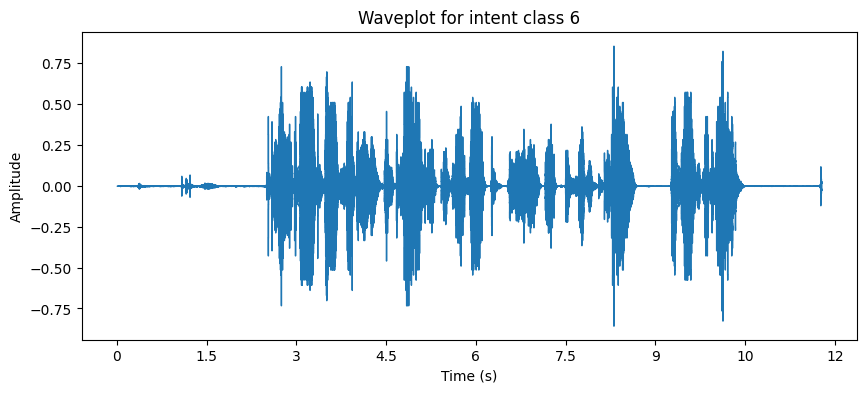

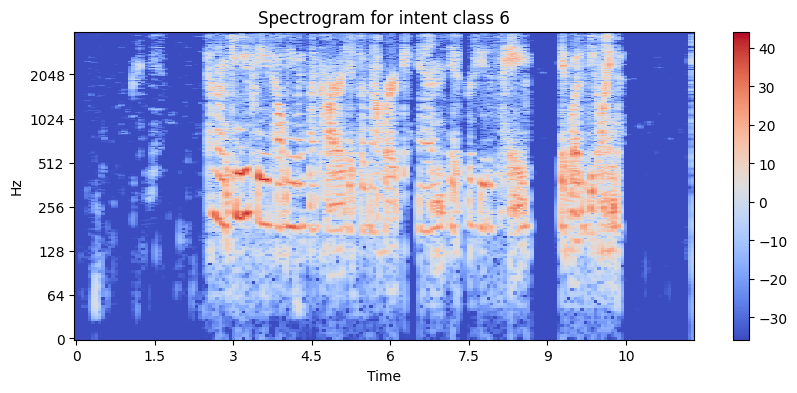

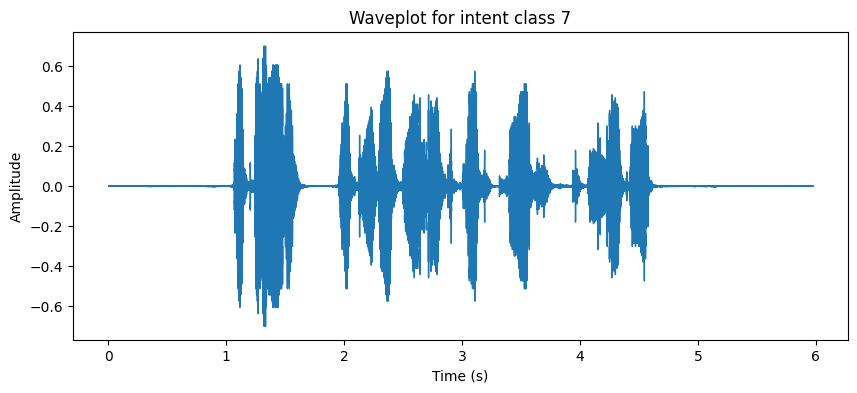

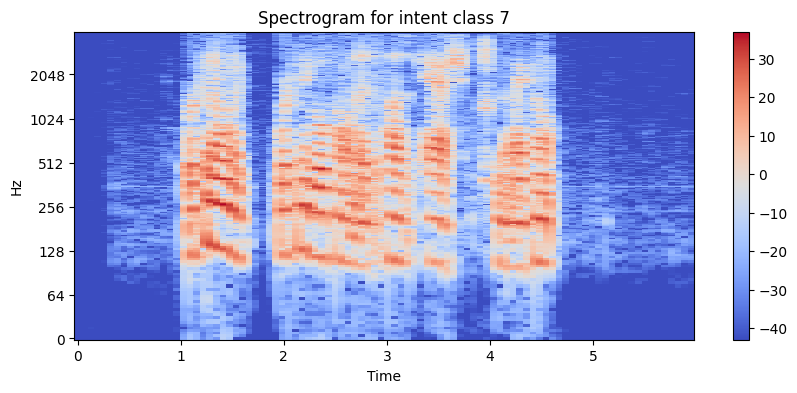

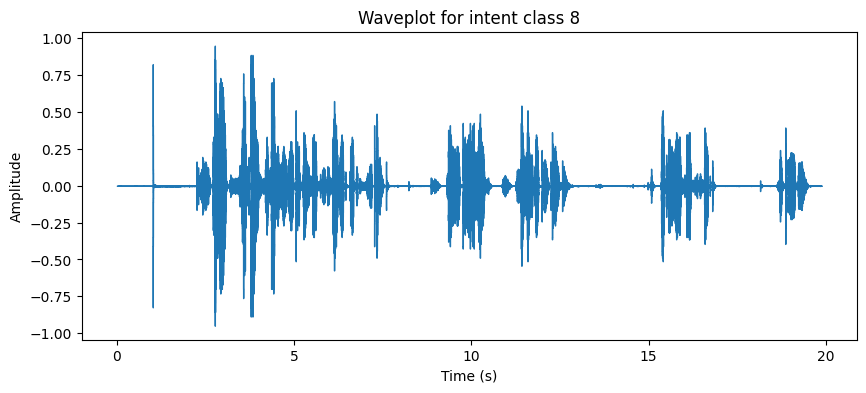

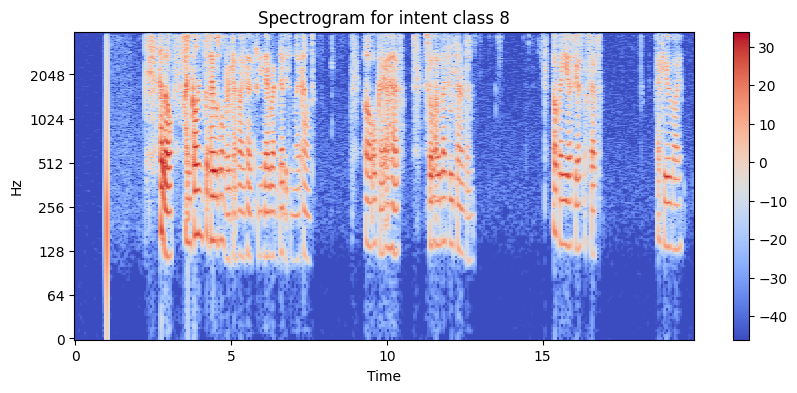

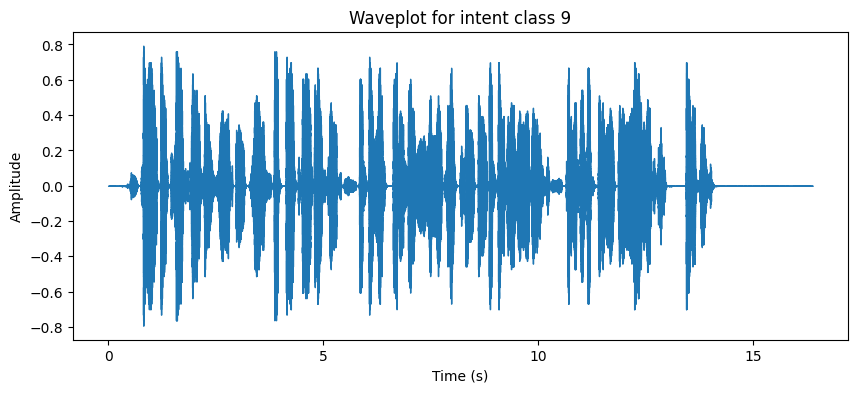

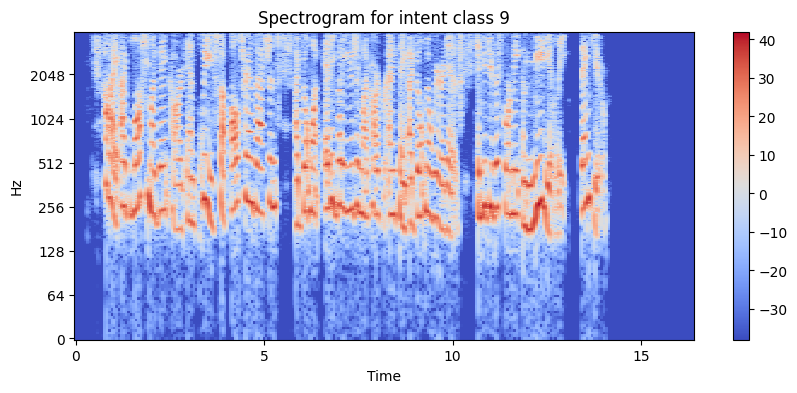

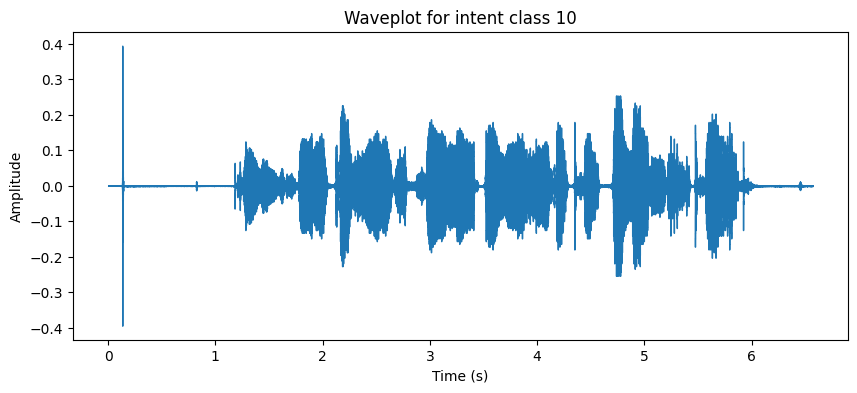

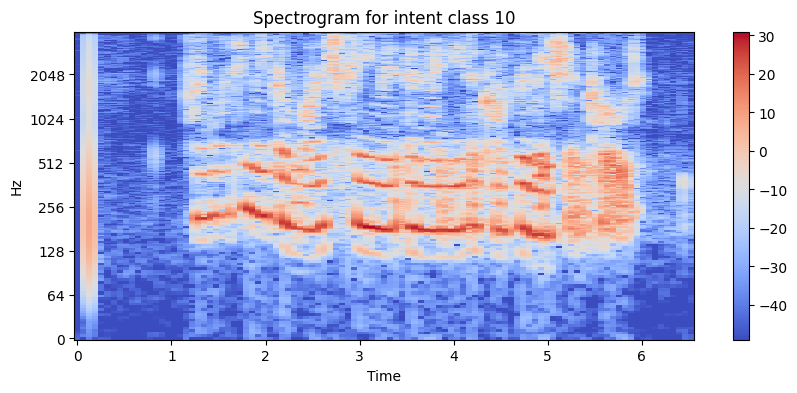

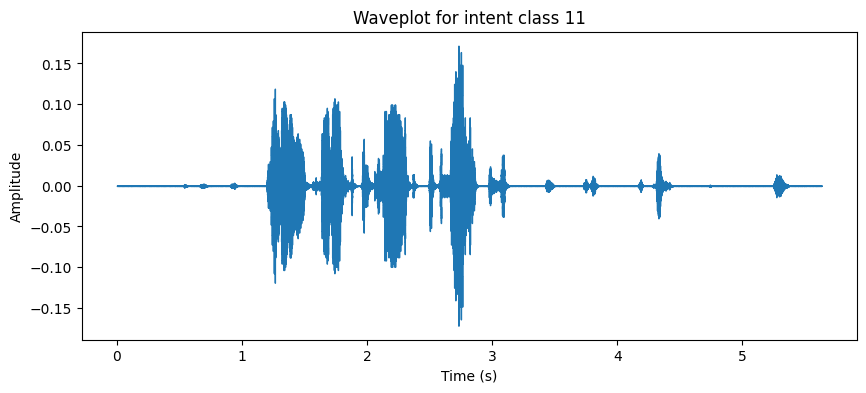

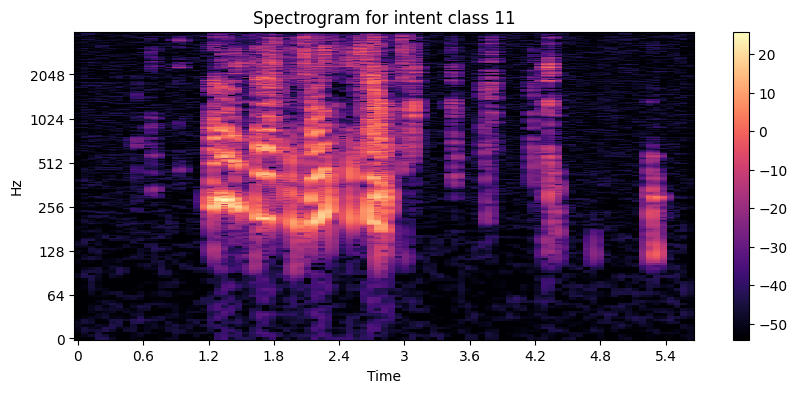

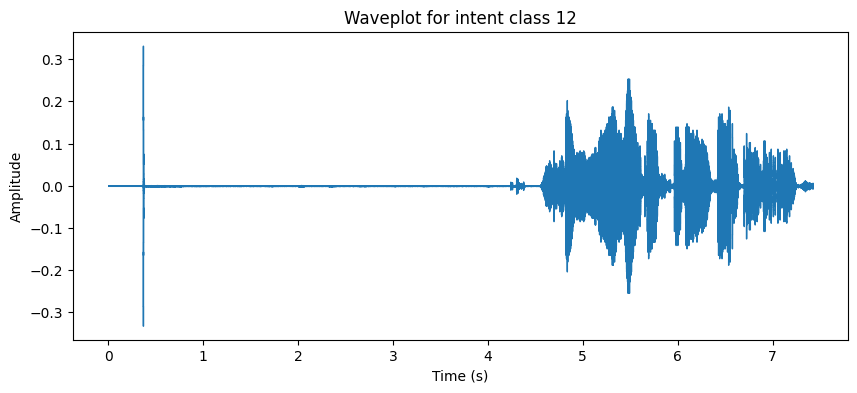

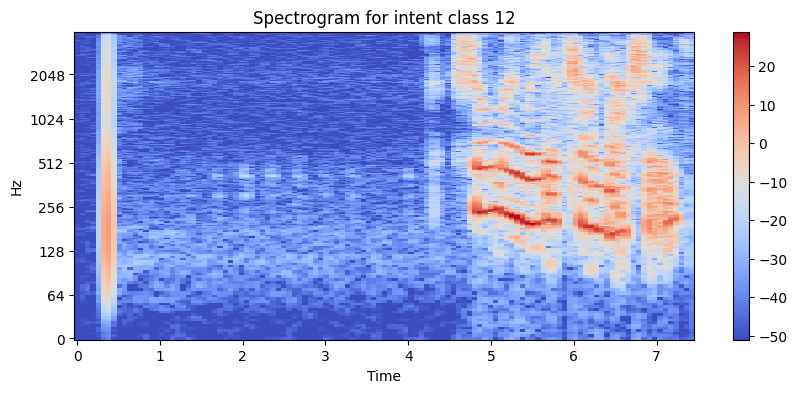

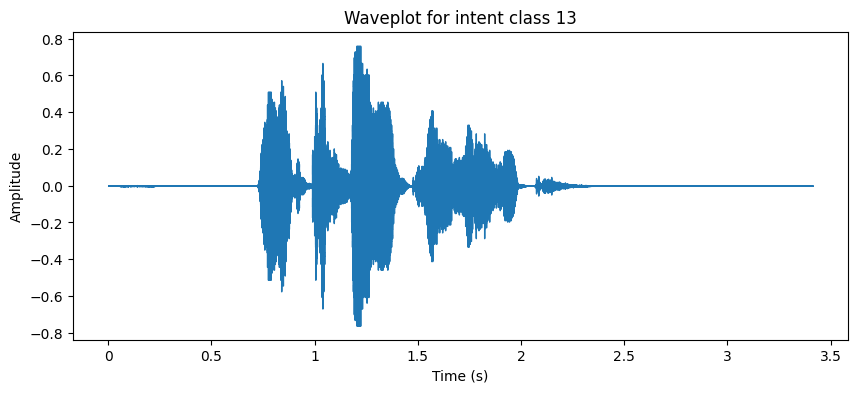

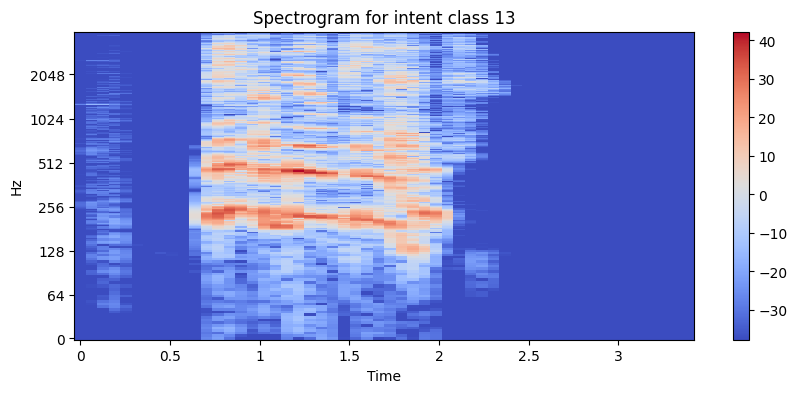

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

# Fungsi untuk membuat plot gelombang (waveplot)
def create_waveplot(data, sampling_rate, intent):
    plt.figure(figsize=(10, 4))
    plt.title(f'Waveplot for intent class {intent}')
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Fungsi untuk membuat spektrogram
def create_spectrogram(data, sampling_rate, intent):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 4))
    plt.title(f'Spectrogram for intent class {intent}')
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

# Daftar intent_class
intent_list = list(train_data['intent_class'].unique())

# Mengurutkan daftar
intent_list = sorted(intent_list)

# Iterasi untuk setiap intent_class
for intent in intent_list:
    # Mendapatkan path pertama dari intent_class yang cocok
    path = train_data['path'][train_data['intent_class'] == intent].iloc[0]
    # Memuat data audio dari path
    data, sampling_rate = librosa.load(path, sr=None)

    # Membuat waveplot
    create_waveplot(data, sampling_rate, intent)

    # Membuat spectrogram
    create_spectrogram(data, sampling_rate, intent)

    # Menampilkan audio
    display(Audio(path))